<a href="https://colab.research.google.com/github/andredarcie/my-data-science-notebooks/blob/master/data_hackers_survey_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Hacker Survey 2019
Resultados da pesquisa de mercado de Data Science feita pelo Data Hackers

## Sobre a base de dados
O dataset é criado a partir de uma pesquisa de mercado de Data Science no Brasil feita pela comunidade Data Hacker e foi retirado do site kaggle no link: [Data Hackers Survey 2019](https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019) em 8 de agosto de 2020.
A pesquisa foi conduzida de forma online durante o mês de Novembro de 2019, e consistia em um questionário com 39 perguntas.
O dataset é composto por 1765 registros e 170 colunas.

## Variáveis que podem ser úteis na análise
Idade, Gênero, Nível de graduação, Salário, Tempo de experiência com Ciência de Dados, Linguagens de programação mais utilizadas, Estado, Emprego, Número de Funcionários e Setor do mercado.

## Questões que possam ser respondidas através da análise
### Sobre a pesquisa
- Qual é a distribuição de idade e gênero?
- Quantos cientistas de dados vivem no Brasil?
- Qual a distribuição dos participantes por estado?
- Maioria das pessoas que responderam a pesquisa são cientista de dados?
- Qual a situação profissional os participantes se encontram?
- Distribuição das pessoas que responderam a pesquisa por área de atuação?
- Qual o tamanho das empresas que os participantes trabalham pelo número de funcionários?
- Qual o nível de ensino mais popular entre os cientistas de dados?

### Mercado de trabalho
- Qual setor do mercado que contrata mais profissionais de ciência de dados?
- Qual plataforma os cientista de dados utilizam para se atualizar sobre o mercado de trabalho?

### Formação/Estudo e Ferramentas
- Quais os métodos mais utilizados por cientistas de dados?
- Quais as linguagens de programação mais utilizadas?
- Quais as fontes de dados mais utilizadas por cientistas de dados?
- Qual a distribuição entre profissionais e não profissionais em relação ao nível de ensino?
- É necessário ter um mestrado para ser cientista de dados?
- Qual a plataforma de curso preferida entre os cientistas de dados?

### Salário
- Qual o maior e menor salário?
- Qual a correlação entre salário e idade?
- Qual setor do mercado de trabalho paga os melhores salários para cientistas
de dados?
- Qual linguagem de programação tem os melhores salários?
- Quais os melhores salários no geral?
- Qual a média salarial dos cientistas de dados?
- Existe relação do salário e o tamanho da empresa?
- Quais os salários dos cientistas de dados?
- Qual a diferença do salário médio por gênero?
- Qual a relação entre salário e experiência como cientista de dados?
- Qual o salário médio por estado?
- Quantos profissionais ganham mais que 15 mil? Quais as características de quem ganha esse salário?


In [2]:
import pandas as pd

df = pd.read_csv('/content/datahackers-survey-2019-anonymous-responses.csv', sep=',')

df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [ ]:
df.shape

(1765, 170)

In [3]:
# Limpando o nome das colunas
df.columns = [cols.replace("(","").replace(")","").replace(",","").replace("'","").replace(" ","_") for cols in df.columns]

In [ ]:
por_cargo = df['D6_anonymized_role'].value_counts().reset_index()
por_cargo.columns = [ 'Cargo', 'Quantidade de pessoas' ]
por_cargo

,Cargo,Quantidade de pessoas
0,Desenvolvedor ou Engenheiro de Software,225
1,Outras,220
2,Data Scientist/Cientista de Dados,167
3,Data Analyst/Analista de Dados,163
4,Business Intelligence/Analista de BI,150
5,Data Engineer/Engenheiro de Dados,130
6,Business Analyst/Analista de Negócios,72
7,Analista de Inteligência de Mercado,29
8,Engenheiro,26
9,Analista de Marketing,19


In [ ]:
df['P21_python'].value_counts().reset_index()

,index,P21_python
0,0,981
1,1,784


Quais das linguagens de programação listadas abaixo você utiliza no trabalho?

In [ ]:
colunas_linguagem_de_programacao = []
linguagens_de_programacao = []
for column in df.columns:
  if 'P21' in column:
    colunas_linguagem_de_programacao.append(column)
    linguagens_de_programacao.append(column.replace('P21', '').replace('_', ' ').strip().capitalize())
  
print(linguagens_de_programacao)

['Sql', 'R', 'Python', 'C c++ c#', 'Dotnet', 'Java', 'Julia', 'Sas stata', 'Visual basic vba', 'Scala', 'Matlab', 'Php', 'No listed languages']


In [ ]:
linguagens_de_programacao_mais_usadas = df['P22_most_used_proggraming_languages'].value_counts().reset_index()
linguagens_de_programacao_mais_usadas.columns = ['Linguagem de programação', 'Quantidade']
linguagens_de_programacao_mais_usadas

,Linguagem de programação,Quantidade
0,Python,459
1,SQL,279
2,R,91
3,SAS/Stata,19
4,Java,17
5,Visual Basic/VBA,12
6,Não utilizo nenhuma das linguagens listadas,10
7,Scala,10
8,C/C++/C#,9


# Sobre a pesquisa

## Qual é a distribuição de idade e gênero?

In [ ]:
por_genero = df['P2_gender'].value_counts(normalize=True) * 100
por_genero = por_genero.reset_index()
por_genero.columns = ['Gênero', 'Porcentagem']
por_genero

,Gênero,Porcentagem
0,Masculino,81.498297
1,Feminino,18.501703


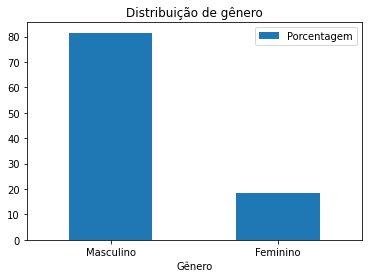

In [ ]:
por_genero.plot.bar(x='Gênero', y='Porcentagem', rot=0, title='Distribuição de gênero')

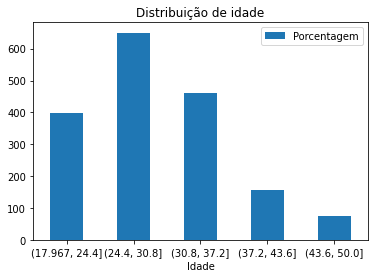

In [ ]:
por_idade = df['P1_age'].value_counts(sort=False, bins=5).reset_index()
por_idade.columns = ['Idade', 'Porcentagem']
por_idade.plot.bar(x='Idade', y='Porcentagem', rot=0, title='Distribuição de idade')

## Quantos cientistas de dados vivem no Brasil?

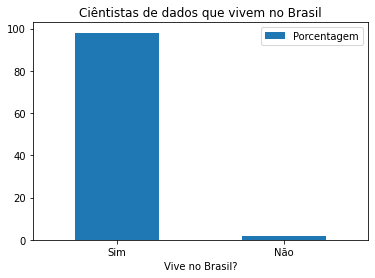

In [ ]:
mora_no_brasil = df['P3_living_in_brasil'].value_counts(normalize=True) * 100
mora_no_brasil = mora_no_brasil.reset_index()
mora_no_brasil = mora_no_brasil.replace(1, 'Sim').replace(0, 'Não')
mora_no_brasil.columns = ['Vive no Brasil?', 'Porcentagem']
mora_no_brasil.plot.bar(x='Vive no Brasil?', y='Porcentagem', rot=0, title='Ciêntistas de dados que vivem no Brasil')

## Qual a distribuição dos participantes por estado?

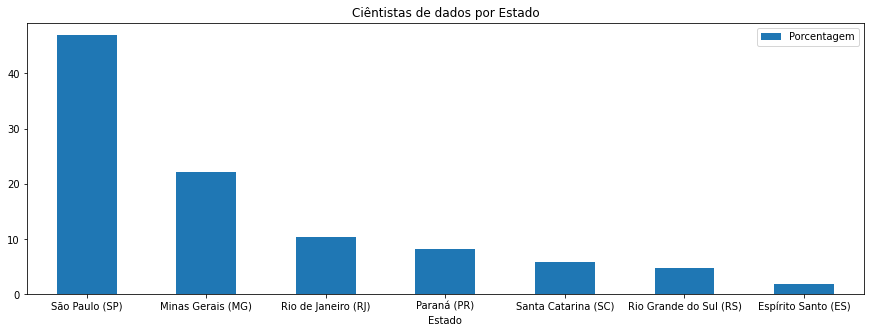

In [ ]:
por_estado = df['P5_living_state'].value_counts(normalize=True) * 100
por_estado = por_estado.reset_index()
por_estado.columns = ['Estado', 'Porcentagem']
por_estado.plot.bar(x='Estado', y='Porcentagem', rot=0, 
                    figsize=(15, 5), title='Ciêntistas de dados por Estado')

## Maioria das pessoas que responderam a pesquisa são cientista de dados?

In [ ]:
por_cargo = df['D6_anonymized_role'].value_counts(normalize=True) * 100
por_cargo = por_cargo.reset_index()
por_cargo

,index,D6_anonymized_role
0,Desenvolvedor ou Engenheiro de Software,17.985612
1,Outras,17.585931
2,Data Scientist/Cientista de Dados,13.349321
3,Data Analyst/Analista de Dados,13.029576
4,Business Intelligence/Analista de BI,11.990408
5,Data Engineer/Engenheiro de Dados,10.391687
6,Business Analyst/Analista de Negócios,5.755396
7,Analista de Inteligência de Mercado,2.318145
8,Engenheiro,2.078337
9,Analista de Marketing,1.518785


## Qual a situação profissional os participantes se encontram?

In [18]:
situacao_profissional = df['P10_job_situation'].value_counts(normalize=True) * 100
situacao_profissional = situacao_profissional.reset_index()
situacao_profissional.columns = ['Cargo', 'Porcentagem']
situacao_profissional

,Cargo,Porcentagem
0,Empregado (CTL),60.793201
1,Empreendedor ou Empregado (CNPJ),13.257790
2,Estagiário,7.422096
3,Somente Estudante (graduação),4.815864
4,"Desempregado, buscando recolocação",3.909348
5,Servidor Público,3.399433
6,Trabalho na área Acadêmica/Pesquisador,2.549575
7,Somente Estudante (pós-graduação),2.039660
8,Freelancer,1.303116
9,Prefiro não dizer,0.339943


## Distribuição das pessoas que responderam a pesquisa por área de atuação?

In [23]:
area_de_atuacao = df['D6_anonymized_role'].value_counts(normalize=True) * 100
area_de_atuacao = area_de_atuacao.reset_index()
area_de_atuacao.columns = ['Cargo', 'Porcentagem']
area_de_atuacao

,Cargo,Porcentagem
0,Desenvolvedor ou Engenheiro de Software,17.985612
1,Outras,17.585931
2,Data Scientist/Cientista de Dados,13.349321
3,Data Analyst/Analista de Dados,13.029576
4,Business Intelligence/Analista de BI,11.990408
5,Data Engineer/Engenheiro de Dados,10.391687
6,Business Analyst/Analista de Negócios,5.755396
7,Analista de Inteligência de Mercado,2.318145
8,Engenheiro,2.078337
9,Analista de Marketing,1.518785


## Qual o tamanho das empresas que os participantes trabalham pelo número de funcionários?

In [ ]:
por_estado = df['P5_living_state'].value_counts(normalize=True) * 100
por_estado = por_estado.reset_index()
por_estado.columns = ['Estado', 'Porcentagem']
por_estado.plot.bar(x='Estado', y='Porcentagem', title='Ciêntistas de dados por Estado')

In [24]:
df.columns.values

array(['P0_id', 'P1_age', 'P2_gender', 'P3_living_in_brasil',
       'P5_living_state', 'P6_born_or_graduated', 'P8_degreee_level',
       'P10_job_situation', 'P12_workers_number', 'P13_manager',
       'P16_salary_range', 'P17_time_experience_data_science',
       'P18_time_experience_before', 'P19_is_data_science_professional',
       'P20_linear_regression', 'P20_logistic_regression', 'P20_glms',
       'P20_decision_tree', 'P20_random_forest', 'P20_neural_networks',
       'P20_bayesian_inference', 'P20_ensemble', 'P20_svms', 'P20_cnns',
       'P20_rnns', 'P20_hmms', 'P20_gans', 'P20_markov_chains', 'P20_nlp',
       'P20_gradient_boosted_machines', 'P20_cluster_analysis',
       'P20_survival_analysis', 'P20_longitudinal_data_analysis',
       'P20_joint_analysis', 'P20_no_listed_methods', 'P21_sql_', 'P21_r',
       'P21_python', 'P21_c_c++_c#', 'P21_dotnet', 'P21_java',
       'P21_julia', 'P21_sas_stata', 'P21_visual_basic_vba', 'P21_scala',
       'P21_matlab', 'P21_php', 'P

## Qual o nível de ensino mais popular entre os cientistas de dados?

# Mercado de trabalho

## Qual setor do mercado que contrata mais profissionais de ciência de dados?

## Qual plataforma os cientista de dados utilizam para se atualizar sobre o mercado de trabalho?

# Formação/Estudo e Ferramentas

## Quais os métodos mais utilizados por cientistas de dados?

## Quais as linguagens de programação mais utilizadas?

## Quais as fontes de dados mais utilizadas por cientistas de dados?

## Qual a distribuição entre profissionais e não profissionais em relação ao nível de ensino?

## É necessário ter um mestrado para ser cientista de dados?

## Qual a plataforma de curso preferida entre os cientistas de dados?

# Salário

## Qual o maior e menor salário?

## Qual a correlação entre salário e idade?

## Qual setor do mercado de trabalho paga os melhores salários para cientistas de dados?

## Qual linguagem de programação tem os melhores salários?

## Quais os melhores salários no geral?

## Qual a média salarial dos cientistas de dados?

## Existe relação do salário e o tamanho da empresa?

## Quais os salários dos cientistas de dados?

## Qual a diferença do salário médio por gênero?

## Qual a relação entre salário e experiência como cientista de dados?

## Qual o salário médio por estado?

## Quantos profissionais ganham mais que 15 mil? Quais as características de quem ganha esse salário?